# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es binaria.


In [1]:
# Carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
#Ruta para guardar las tablas y reportes
ruta='C:/4_F5/012_noSupervisado/Nat_noSupervisado/'

In [3]:
import pandas as pd
import os

def load_data(file_path):
    """
    Carga los datos del archivo CSV.

    Args:
        file_path (str): Ruta al archivo CSV.

    Returns:
        pd.DataFrame: DataFrame con los datos cargados o None si hay un error.
    """

    # Obtener la ruta absoluta del archivo para evitar problemas con rutas relativas
    abs_file_path = os.path.abspath(file_path)

    # Verificar si el archivo existe en la ruta especificada
    if not os.path.exists(abs_file_path):
        # Imprimir mensajes de error detallados si el archivo no existe
        print(f"Error: El archivo no existe en la ruta: {abs_file_path}")
        print(f"Directorio actual: {os.getcwd()}")  # Mostrar el directorio actual para ayudar a depurar
        print("Contenido del directorio:")
        try:
            # Intentar listar el contenido del directorio para ayudar a identificar el problema
            print(os.listdir(os.path.dirname(abs_file_path)))
        except FileNotFoundError:
            print("El directorio no existe.")  # Informar si el directorio tampoco existe
        return None  # Devolver None para indicar que la carga falló

    try:
        # Intentar cargar los datos utilizando pandas
        df = pd.read_csv(abs_file_path)
        print(f"Datos cargados exitosamente. Shape: {df.shape}")  # Confirmar la carga exitosa
        return df
    except Exception as e:
        # Capturar cualquier excepción que ocurra durante la carga e imprimir un mensaje de error
        print(f"Error al cargar los datos: {e}")
        return None



In [4]:
# Bloque de ejemplo de uso (solo se ejecuta si el script se ejecuta directamente)
if __name__ == "__main__":
    # Obtener la ruta al archivo CSV dentro de la estructura del proyecto
    #script_dir = os.path.dirname(os.path.abspath(__file__)) #sólo sirve cuando es .py porque la variable __file__ no está disponible porque no se está ejecutando un script de Python directamente.
    #project_root = os.path.dirname(os.path.dirname(script_dir))
    #data_path = os.path.join(project_root, "data", "mushrooms.csv") #(project_root,"carpeta","subcarpeta","archivo.csv")
    data_path = data_path = os.path.join(os.getcwd(), "data", "mushrooms.csv")

    print(f"Intentando cargar el archivo desde: {data_path}")


    # Llamar a la función load_data para cargar los datos
    
    df = load_data(data_path)
    if df is not None:
        # Imprimir las primeras filas del DataFrame si la carga fue exitosa
        print(df.head())
    else:
        # Imprimir un mensaje de error si la carga falló
        print("No se pudieron cargar los datos. Verifica la ruta del archivo y su existencia.")

Intentando cargar el archivo desde: c:\4_F5\012_noSupervisado\Nat_noSupervisado\data\mushrooms.csv
Datos cargados exitosamente. Shape: (8124, 23)
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stal

### Leer conjunto de datos y primer vistazo

In [5]:
# Leer el csv y sacar por pantalla las cinco primeras filas.

def lectura_csv(df):
    return df.head()
print(lectura_csv(df))

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

La librería OS nos permite navegar entre los directorios del sistema

### Exploración de datos

In [6]:
# Descripción del conjunto de datos, estándard.


print(df.describe(include='object').T) # con el parámetro include='object' para obtener estadísticas descriptivas para las columnas categóricas.

                         count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type                 8124      5   

In [7]:
# Información sobre el tipo de datos de cada feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
print(f'El número de filas del dataset es:\n{df.shape[0]:,}')

El número de filas del dataset es:
8,124


In [9]:

# Igual que otras veces, una linea, contar los nulos por variable.
def count_missing(df):
    missing_values = df.isnull().sum()
    if (missing_values == 0).all():
        return "El conteo por columna de valores 'missing' resulta 0. Es decir, no hay valores 'missing'"
    else:
        return missing_values

print(count_missing(df))

El conteo por columna de valores 'missing' resulta 0. Es decir, no hay valores 'missing'


In [10]:
#---- Verifica si hay columnas duplicadas
duplicated_cols = df.columns[df.columns.duplicated()]

if len(duplicated_cols) > 0:
    print("Columnas duplicadas:", duplicated_cols)
else:
    print("No hay columnas duplicadas")

No hay columnas duplicadas


In [11]:
for col in df.columns:
    print(df[col].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
bruises
f    4748
t    3376
Name: count, dtype: int64
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: coun

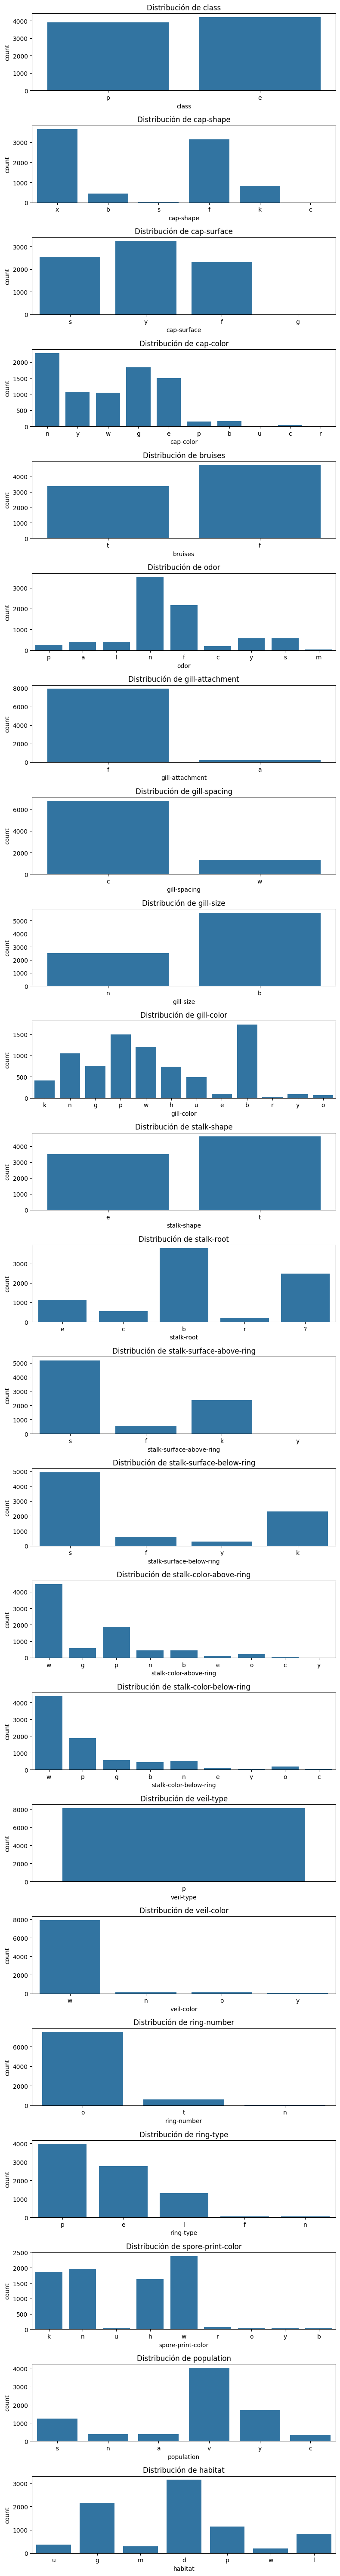

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear una figura con múltiples subplots
fig, axs = plt.subplots(nrows=23, ncols=1, figsize=(8, 60))

# Iterar sobre cada variable y crear un gráfico de barras
for i, variable in enumerate(df.columns):
    sns.countplot(x=variable, data=df, ax=axs[i])
    axs[i].set_title(f'Distribución de {variable}')

# Ajustar el layout para que los títulos no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [13]:
#Considero que valores raros son aquellos que suponen un 1% del total de registros
for col in df.columns:
    print(df[col].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
bruises
f    4748
t    3376
Name: count, dtype: int64
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: coun

#### Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [14]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).

values_unique=pd.DataFrame({'categories':df.nunique()})
print(values_unique)

                          categories
class                              2
cap-shape                          6
cap-surface                        4
cap-color                         10
bruises                            2
odor                               9
gill-attachment                    2
gill-spacing                       2
gill-size                          2
gill-color                        12
stalk-shape                        2
stalk-root                         5
stalk-surface-above-ring           4
stalk-surface-below-ring           4
stalk-color-above-ring             9
stalk-color-below-ring             9
veil-type                          1
veil-color                         4
ring-number                        3
ring-type                          5
spore-print-color                  9
population                         6
habitat                            7


#### Tratar aquellos valores que entendamos que sean nulos


In [15]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.

#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [16]:
# Dejar por el camino si procede.
# Diluyo el df para que se expanda cada features según su categoría
melted_df = pd.melt(df, var_name='Features', value_name='Categories')
grouped_df = melted_df.groupby(['Features', 'Categories']).size().reset_index(name='count_values')

category_totals = grouped_df.groupby('Features')['count_values'].transform('sum')
#machaco la variable
grouped_df['ratio']=round((grouped_df['count_values'] / category_totals ),2)
print(grouped_df)

       Features Categories  count_values  ratio
0       bruises          f          4748   0.58
1       bruises          t          3376   0.42
2     cap-color          b           168   0.02
3     cap-color          c            44   0.01
4     cap-color          e          1500   0.18
..          ...        ...           ...    ...
114  veil-color          n            96   0.01
115  veil-color          o            96   0.01
116  veil-color          w          7924   0.98
117  veil-color          y             8   0.00
118   veil-type          p          8124   1.00

[119 rows x 4 columns]


In [17]:
grouped_df.to_csv(ruta+'tables/df_grouped.csv')

In [18]:
#Voy a filtrar el dataframe agrupado para que --> ¿Qué hago con los ?
#count = (grouped_df['ratio'] < 0.01).sum()
under_one = grouped_df[grouped_df['ratio'] < 0.01]
print(f"Valores menores a 0.01 en la columna 'ratio': {(grouped_df['ratio'] < 0.01).sum()}")
print(under_one)

Valores menores a 0.01 en la columna 'ratio': 15
                     Features Categories  count_values  ratio
8                   cap-color          r            16    0.0
9                   cap-color          u            16    0.0
13                  cap-shape          c             4    0.0
16                  cap-shape          s            32    0.0
19                cap-surface          g             4    0.0
34                 gill-color          r            24    0.0
53                       odor          m            36    0.0
64                ring-number          n            36    0.0
70                  ring-type          n            36    0.0
82     stalk-color-above-ring          c            36    0.0
89     stalk-color-above-ring          y             8    0.0
91     stalk-color-below-ring          c            36    0.0
98     stalk-color-below-ring          y            24    0.0
109  stalk-surface-above-ring          y            24    0.0
117                ve

#### Separar entre variables predictoras y variables a predecir

In [19]:
# La variable que trata de predecir este conjunto de datos es 'class'.
# Por tanto la variable objetivo es 'y'
# las variables predictoras son las columnas son 'x'
y = df['class']
print(y.head())
x =df.drop(columns=['class','veil-type'])

print(x.head())

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-above-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-surface-below-ring stalk-color-above-ring stal

In [20]:
########## Hago ingeniería de características

In [21]:
##### Miro la correlación entre las variables predictoras para ello hay que codificar primero, pero es mejor para variables cuantitativas.


#### Codificar correctamente las variables categóricas a numéricas

----> Creo que es error

 One Hot Encoder necesita ver toda la información de las variables categóricas en X para codificarlas correctamente. Si aplicas el One Hot Encoder después de dividir X en X_train y X_test, podrías perder información importante y obtener resultados inconsistentes.

In [22]:
# One Hot Encoder (una linea).


#### Train test split

----> la codificación de etiquetas debe realizarse después de la partición de los datos en conjuntos de train y test, ya que de lo contrario se podría producir un problema de "fuga de datos" (data leakage), donde el modelo se beneficia de información que no debería tener acceso.

In [23]:
from sklearn.model_selection import train_test_split
# Os lo dejamos a todos igual
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print(x_train)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
3244         f           f         e       t    n               f   
3739         x           f         g       f    c               f   
2154         x           f         e       t    n               f   
1344         f           s         w       f    n               f   
7852         k           y         n       f    s               f   
...        ...         ...       ...     ...  ...             ...   
5226         x           y         n       f    f               f   
5390         k           y         e       t    n               f   
860          f           y         n       t    l               f   
7603         k           s         e       f    f               f   
7270         k           f         g       f    n               f   

     gill-spacing gill-size gill-color stalk-shape  ...  \
3244            c         b          n           t  ...   
3739            w         n          p           e  .

In [24]:
# ---- Me resulta demasiadas columnas, voy a ver si con Label. Label no, porque aporta 'ordinalidad'
""" 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train_lab=le.fit_transform(x_train.values)
x_test_lab=le.transform(x_test.values) # se garantiza que el modelo no tenga acceso a información que no debería tener y que las categorías se asignen de manera consistente en ambos conjuntos de datos.

"""


' \nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nx_train_lab=le.fit_transform(x_train.values)\nx_test_lab=le.transform(x_test.values) # se garantiza que el modelo no tenga acceso a información que no debería tener y que las categorías se asignen de manera consistente en ambos conjuntos de datos.\n\n'

De la siguiente manera, puedes asegurarte de que la codificación one-hot se aplique de manera consistente a ambos conjuntos de datos, y que el modelo de codificación se ajuste solo a los datos de entrenamiento.

Hay que recordar que, si no separamos los conjuntos de datos antes de la codificación, podríamos estar introduciendo sesgo en el modelo, ya que el conjunto de prueba podría influir en la codificación one-hot.

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar One Hot Encoder a X
ohe = OneHotEncoder(handle_unknown='ignore') #
ohe_ajuste=ohe.fit(x_train) # se ajusta el modelo de codificación para que sepa cómo codificar las categorías presentes en el conjunto de entrenamiento (train)
x_train_encoded =ohe.transform(x_train) #se aplica la codificación ajustada en fit al conjunto de entrenamiento (train)

x_test_encoded= ohe.transform(x_test) #se aplica la codificación ajustada en fit al conjunto de test 


# Convierte la matriz de salida en un dataframe
df_x_train_enc = pd.DataFrame(x_train_encoded.toarray(), columns=ohe.get_feature_names_out())
df_x_test_enc = pd.DataFrame(x_test_encoded.toarray(), columns=ohe.get_feature_names_out())

print(df_x_train_enc)
print(df_x_test_enc)

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0             0.0          0.0          1.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             0.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          1.0          0.0          0.0   
4             0.0          0.0          0.0          1.0          0.0   
...           ...          ...          ...          ...          ...   
5438          0.0          0.0          0.0          0.0          0.0   
5439          0.0          0.0          0.0          1.0          0.0   
5440          0.0          0.0          1.0          0.0          0.0   
5441          0.0          0.0          0.0          1.0          0.0   
5442          0.0          0.0          0.0          1.0          0.0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0             0.0            1.0          

## PCA

In [26]:
#La matriz de correlación puede no ser la mejor opción para analizar la relación entre variables categóricas. En su lugar, podrías utilizar métricas de asociación como la chi-cuadrado o la métrica de información mutua para analizar la relación entre variables categóricas.

In [27]:
#La reducción de dimensionalidad mediante PCA asume una distrución normal de los datos.

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

In [28]:
""" 
from sklearn.decomposition import PCA
pca = PCA()    # metodo de sklearn
pca.fit(x_train_encoded) # método fit solo ajusta los parámetros del modelo PCA según los datos de entrenamiento



# Calcular la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular el número de componentes necesarios para retener el 95% de la varianza
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

#Ajustar
pca = PCA(n_components=n_components)
pca.fit(df_x_test_enc)


# Aplicar la transformación PCA a ambos conjuntos de datos
x_train_pca = pca.transform(df_x_train_enc)
x_test_pca = pca.transform(df_x_test_enc)

df_x_train_pca=pd.DataFrame(x_train_pca, columns=pca.get_feature_names_out())
print(df_x_train_pca)
# Representar en un scatterplot y poner en color las etiquetas de entrenamiento
 """

' \nfrom sklearn.decomposition import PCA\npca = PCA()    # metodo de sklearn\npca.fit(x_train_encoded) # método fit solo ajusta los parámetros del modelo PCA según los datos de entrenamiento\n\n\n\n# Calcular la proporción de varianza explicada por cada componente principal\nexplained_variance_ratio = pca.explained_variance_ratio_\n\n# Calcular el número de componentes necesarios para retener el 95% de la varianza\ncumulative_variance = np.cumsum(explained_variance_ratio)\nn_components = np.argmax(cumulative_variance >= 0.95) + 1\n\n#Ajustar\npca = PCA(n_components=n_components)\npca.fit(df_x_test_enc)\n\n\n# Aplicar la transformación PCA a ambos conjuntos de datos\nx_train_pca = pca.transform(df_x_train_enc)\nx_test_pca = pca.transform(df_x_test_enc)\n\ndf_x_train_pca=pd.DataFrame(x_train_pca, columns=pca.get_feature_names_out())\nprint(df_x_train_pca)\n# Representar en un scatterplot y poner en color las etiquetas de entrenamiento\n '

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

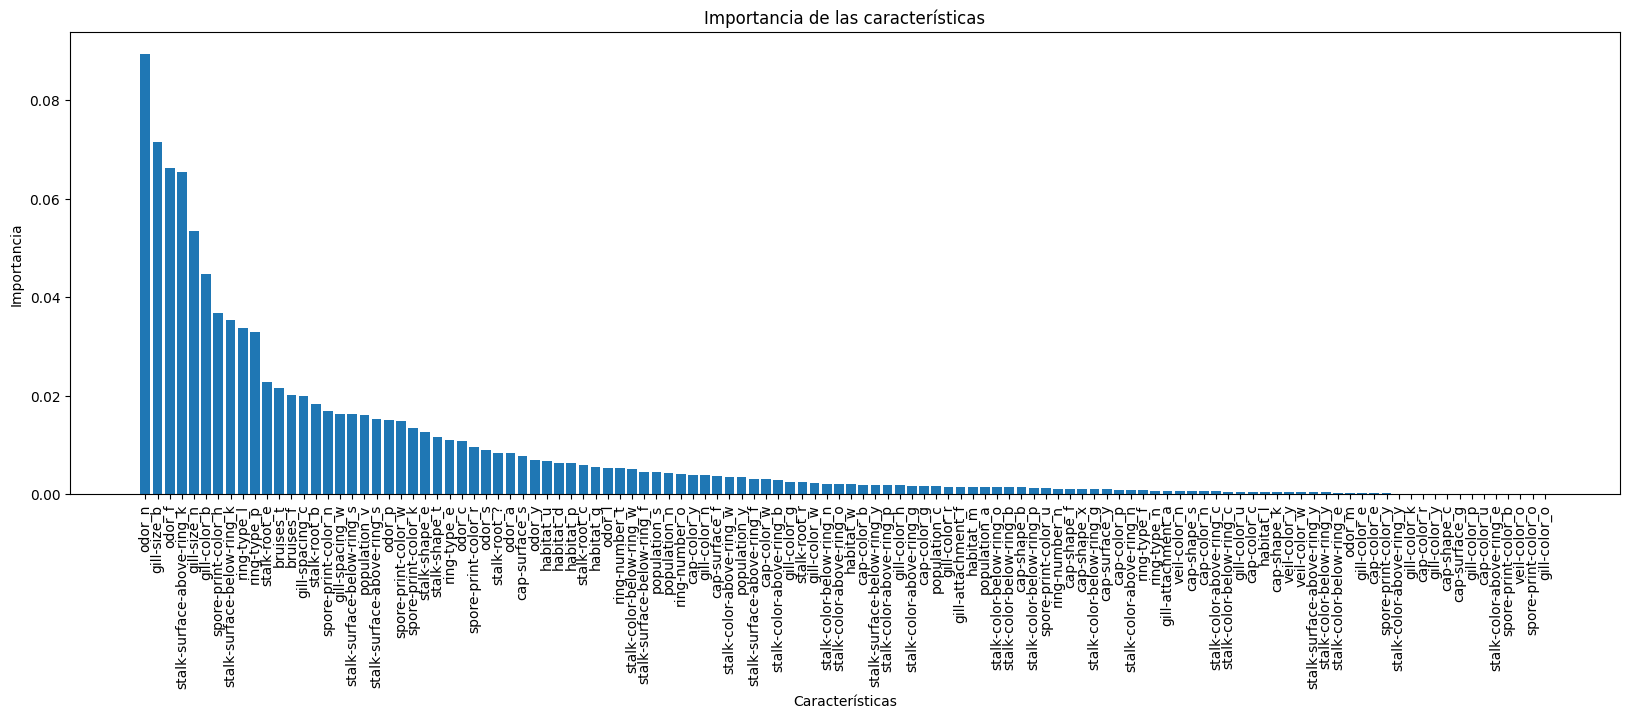

In [29]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

# Entrena un modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_x_train_enc, y_train)

# Selecciona las características más importantes


# Plotear la importancia de las características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20, 6))
plt.bar(range(df_x_train_enc.shape[1]), importances[indices])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
#plt.xticks(range(df_x_train_pca.shape[1]), df_x_train_pca.columns[indices], rotation=90)

plt.xticks(range(df_x_train_enc.shape[1]), np.take(df_x_train_enc.columns, indices), rotation=90)
plt.show()


In [30]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf, threshold=-1)

selected_features = np.take(df_x_train_enc.columns, indices)[:10]
print("Características seleccionadas:", selected_features.values)
print(importances[indices][:15])


Características seleccionadas: ['odor_n' 'gill-size_b' 'odor_f' 'stalk-surface-above-ring_k'
 'gill-size_n' 'gill-color_b' 'spore-print-color_h'
 'stalk-surface-below-ring_k' 'ring-type_l' 'ring-type_p']
[0.08927835 0.07140566 0.06626775 0.06533942 0.05340944 0.04467047
 0.03670384 0.03538199 0.03368305 0.03291358 0.0227369  0.02147013
 0.02011403 0.01988282 0.01823216]


Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [31]:
x_train.shape

(5443, 21)

¿Muchas features no? Vamos a reducir las usando PCA.

Score para odor_n features: 0.976
Score para gill-size_b features: 0.976
Score para odor_f features: 0.976
Score para stalk-surface-above-ring_k features: 0.976
Score para gill-size_n features: 0.976
Score para gill-color_b features: 0.976
Score para spore-print-color_h features: 0.976
Score para stalk-surface-below-ring_k features: 0.976
Score para ring-type_l features: 0.976
Score para ring-type_p features: 0.976


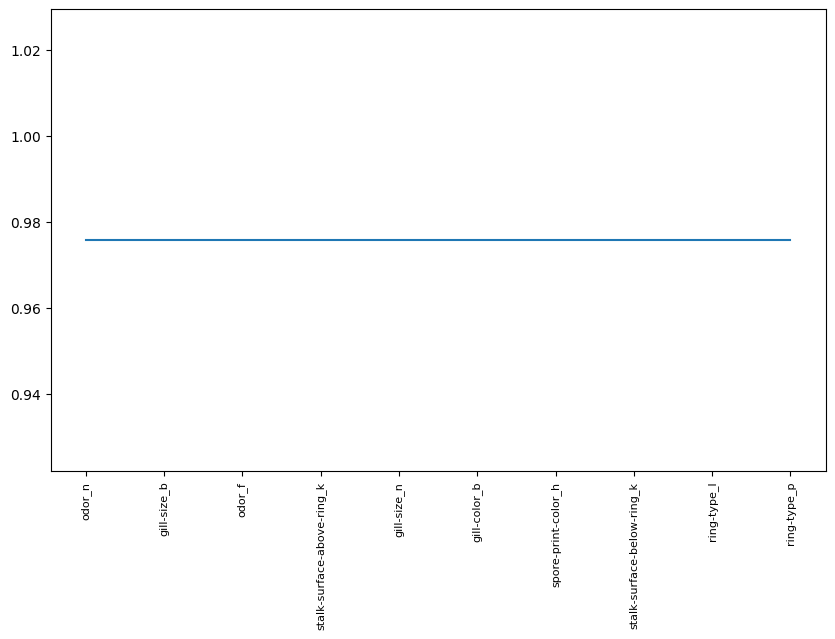

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

n_features = selected_features.values# definir un rango de valores a probar
scores = []

""" for n in n_features:

    # Hacer PCA sobre X_train
    # 1. Definir PCA
    # 2. Aprender PCA sobre X_train

    # Entrenar Random Forest
    # 1. Definir el RF
    # 2. Entrenar clasificador

    # Guardar el score """

for n in n_features:
    # Hacer PCA sobre X_train
    pca = PCA(n_components=10)  # 1. Definir PCA
    X_train_pca = pca.fit_transform(df_x_train_enc[n_features])  # 2. Aprender PCA sobre X_train
    X_test_pca = pca.transform(df_x_test_enc[n_features])  # Aplicar transform a X_test con el ajuste del PCA

    # Entrenar Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 1. Definir el RF
    rf.fit(X_train_pca, y_train)  # 2. Entrenar clasificador

    # Evaluar el modelo
    y_pred = rf.predict(X_test_pca)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

    print(f"Score para {n} features: {score:.3f}")



plt.figure(figsize=(10, 6))
sns.lineplot(x=n_features, y=scores)
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [33]:
# Hacer PCA sobre X_train
pca = PCA(n_components=10)  # 1. Definir PCA
X_train_pca = pca.fit_transform(df_x_train_enc[n_features])  # 2. Aprender PCA sobre X_train
X_test_pca = pca.transform(df_x_test_enc[n_features])  # Aplicar transform a X_test con el ajuste del PCA

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42)  # 1. Definir el RF
rf.fit(X_train_pca, y_train)  # 2. Entrenar clasificador

# Evaluar el modelo
y_pred = rf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred)


print(f"Score: {score:.3f}")

Score: 0.976


In [34]:
from sklearn.model_selection import cross_val_score

# Definir el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

# Definir la función de evaluación
scores = cross_val_score(rf, X_train_pca, y_train, cv=5, scoring='accuracy')

# Calcular la media y la desviación estándar de los scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Score de validación cruzada: {mean_score:.3f} ± {std_score:.3f}")

Score de validación cruzada: 0.978 ± 0.004


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1342   36]
 [  29 1274]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.98      0.97      0.98      1378
           p       0.97      0.98      0.98      1303

    accuracy                           0.98      2681
   macro avg       0.98      0.98      0.98      2681
weighted avg       0.98      0.98      0.98      2681



In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Definir el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

# Crear una lista para almacenar los scores de entrenamiento y prueba
train_scores = []
test_scores = []

# Iterar sobre diferentes tamaños de conjunto de entrenamiento
for i in range(1, len(X_train_pca) + 1):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
        X_train_pca, y_train, test_size=i, random_state=42
    )

    # Entrenar el modelo en el conjunto de entrenamiento
    rf.fit(X_train_subset, y_train_subset)

    # Evaluar el modelo en el conjunto de entrenamiento y prueba
    y_pred_train = rf.predict(X_train_subset)
    y_pred_test = rf.predict(X_test_subset)

    # Calcular la precisión en el conjunto de entrenamiento y prueba
    train_score = accuracy_score(y_train_subset, y_pred_train)
    test_score = accuracy_score(y_test_subset, y_pred_test)

    # Agregar los scores a las listas
    train_scores.append(train_score)
    test_scores.append(test_score)

# Graficar la curva de aprendizaje
plt.plot(range(1, len(X_train_pca) + 1), train_scores, label='Entrenamiento')
plt.plot(range(1, len(X_train_pca) + 1), test_scores, label='Prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()

KeyboardInterrupt: 

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




In [ ]:
""" from sklearn.cluster import KMeans

scores = []
k_values = # definir un rango
for a in k_values:

    # Definir Kmeans y ajustar
    # Guardar la predicción

sns.lineplot(x=k_values, y=scores) """

C:\Users\nel_n\AppData\Local\Temp\ipykernel_3032\3773103836.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


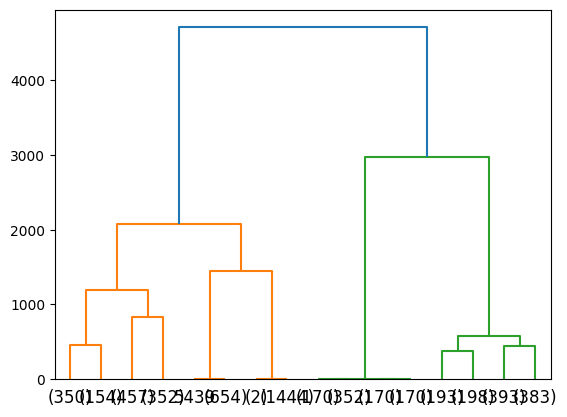

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import pairwise_distances
# Crear una matriz de distancia entre los datos
distance_matrix = pairwise_distances(X_train_pca, metric='euclidean')

# Crear un objeto linkage
Z = linkage(distance_matrix, method='ward')

# Dibujar el dendrograma
dendrogram(Z, truncate_mode='level', p=3)

# Predecir los clusters utilizando un umbral de distancia
clusters = fcluster(Z, t=3, criterion='distance')

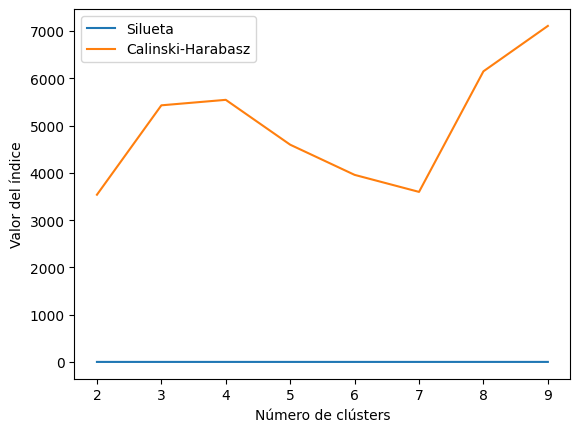

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Definir el rango de valores de k
k_values = range(2, 10)

# Inicializar listas para almacenar los resultados
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Iterar sobre los valores de k
for k in k_values:
    # Crear un objeto KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajustar el modelo de KMeans a los datos
    kmeans.fit(X_train_pca)
    
    # Calcular la silueta
    silhouette = silhouette_score(X_train_pca, kmeans.labels_)
    silhouette_scores.append(silhouette)
    
    # Calcular el índice de Calinski-Harabasz
    calinski_harabasz = calinski_harabasz_score(X_train_pca, kmeans.labels_)
    calinski_harabasz_scores.append(calinski_harabasz)
    
    # Calcular el índice de Davies-Bouldin
    

# Dibujar los gráficos
plt.plot(k_values, silhouette_scores, label='Silueta')
plt.plot(k_values, calinski_harabasz_scores, label='Calinski-Harabasz')

plt.xlabel('Número de clústers')
plt.ylabel('Valor del índice')
plt.legend()
plt.show()

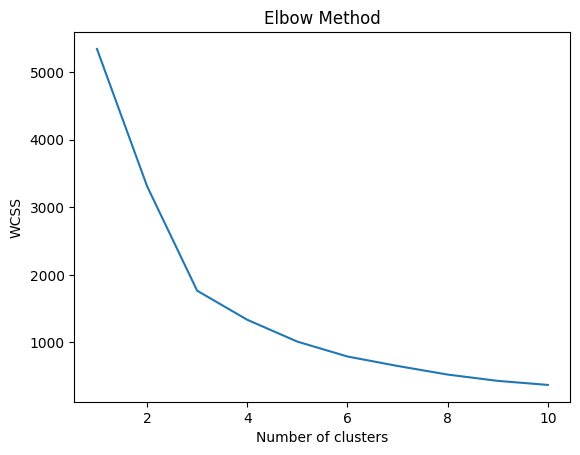

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_test_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

In [ ]:
# Aprender Kmeans con el valor de K obtenido.

kmeans = # Definir y entrenar Kmeans.

# Preparar el catplot.


# Pintar.
ax = sns.catplot(col=, x=, data=, kind='count',col_wrap=4)

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

In [ ]:
# Entrenar PCA para representar.

# Usar un color por cada cluster.


¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.